### Heart Rate Monitoring on Running Sessions of 2024

In [116]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:

file_path = 'David+_Diaz+_2024-01-01_15-35-44.CSV'
# Read the first row separately as it contains aggregated statistics
header = pd.read_csv(file_path, nrows=1)
# Grab the rest of the rows on the data
running = pd.read_csv(file_path, skiprows=[0, 1])

In [130]:
# Visualize a Section of the Data
running.head()

,Sample rate,Time,HR,Speed,Pace,Cadence,Altitude (ft),Stride length (in),Distances (ft),Temperatures (F),Power (W),Unnamed: 11,Pace_in_minutes,Time_in_seconds
0,1.0,00:00:00,119,0.0,00:00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.000000,0
1,NaN,00:00:01,114,5.8,10:21,NaN,NaN,NaN,0.00,NaN,NaN,NaN,10.350000,1
2,NaN,00:00:02,114,5.8,10:21,NaN,NaN,NaN,12.15,NaN,NaN,NaN,10.350000,2
3,NaN,00:00:03,115,5.8,10:21,NaN,NaN,NaN,24.46,NaN,NaN,NaN,10.350000,3
4,NaN,00:00:04,115,6.5,09:11,NaN,NaN,NaN,37.99,NaN,NaN,NaN,9.183333,4


In [119]:
# Visualize the header section
header

,Name,Sport,Date,Start time,Duration,Total distance (mi),Average heart rate (bpm),Average speed (mi/h),Max speed (mi/h),Average pace (min/mi),...,Descent (ft),Average power (W),Max power (W),Notes,Height (ft in),Weight (lbs),HR max,HR sit,VO2max,Unnamed: 27
0,David Diaz,RUNNING,01-01-2024,15:35:44,00:23:38,3.0,159,7.6,9.6,07:53,...,NaN,NaN,NaN,NaN,5 9,163.1,197,NaN,54,NaN


In [120]:
def convert_time_to_seconds(time_str):
    """This function is to correctly transform the time metrics in strings cotaining colons in between into their respective unit"""
    try:
        # Split the time string into parts
        parts = list(map(int, time_str.split(':')))

        if len(parts) == 3:
            hours, minutes, seconds = parts
            return hours * 3600 + minutes * 60 + seconds
        elif len(parts) == 2:
            minutes, seconds = parts
            return minutes + seconds / 60
        else:
            return None
    except Exception:
        return None

In [121]:
# Rename the Columns into Name without whitespaces
running.rename(columns={'HR (bpm)': 'HR', 'Speed (mi/h)': 'Speed', 'Pace (min/mi)': 'Pace'}, inplace=True)

In [122]:
# Create new Columns and utilize the function from above to convert into their respective units
running['Pace_in_minutes'] = running['Pace'].apply(convert_time_to_seconds)
running['Time_in_seconds'] =  running['Time'].apply(convert_time_to_seconds)

In [123]:
# Get only specific Columns
running_df = running[['Time','HR', 'Pace_in_minutes', 'Time_in_seconds', 'Speed', 'Pace']]

In [125]:
# Descriptive Statistics
running_df.describe()

,HR,Pace_in_minutes,Time_in_seconds,Speed
count,1420.000000,1420.000000,1420.000000,1420.000000
mean,158.778873,8.373075,709.500000,7.265282
std,8.726466,1.167468,410.063003,0.853702
min,113.000000,0.000000,0.000000,0.000000
25%,155.000000,7.733333,354.750000,6.900000
50%,160.000000,8.183333,709.500000,7.300000
75%,164.000000,8.754167,1064.250000,7.800000
max,172.000000,15.750000,1419.000000,9.600000


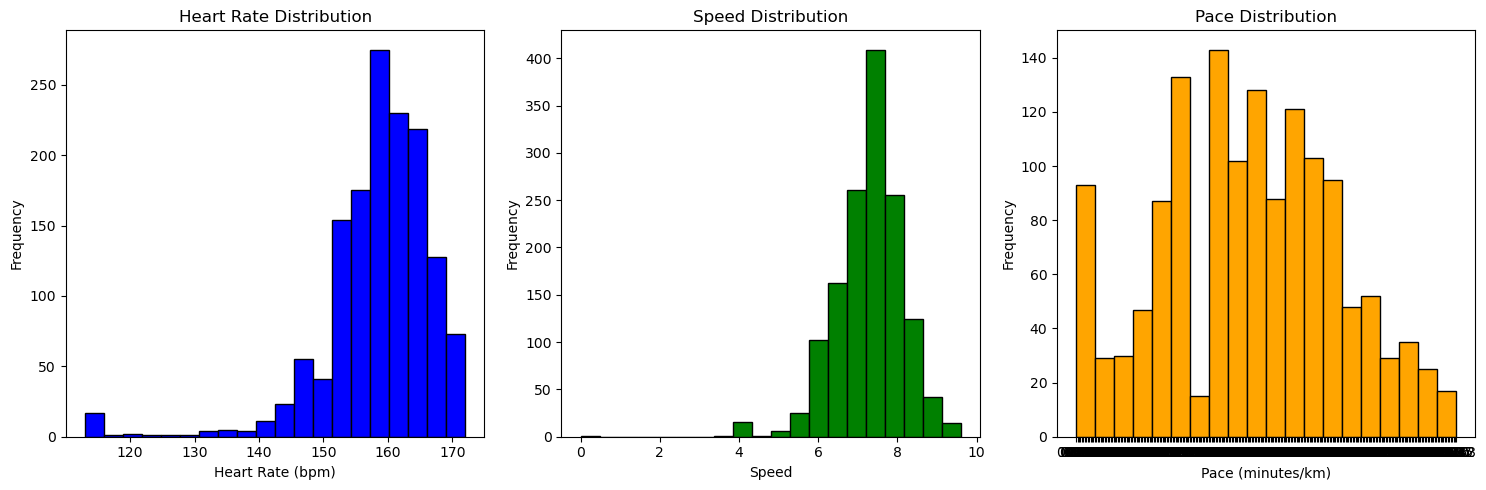

In [126]:
# Name the variables
heart_rate = running_df['HR']
time = running_df['Time']
date = header['Date'][0]
speed = running_df['Speed']
pace = running_df['Pace_in_minutes']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot histogram for heart_rate
axes[0].hist(heart_rate, bins=20, color='blue', edgecolor='black')
axes[0].set_title('Heart Rate Distribution')
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Frequency')

# Plot histogram for time (make sure time is numerical or processed)
axes[1].hist(speed, bins=20, color='green', edgecolor='black')
axes[1].set_title('Speed Distribution')
axes[1].set_xlabel('Speed')
axes[1].set_ylabel('Frequency')

# Plot histogram for pace
axes[2].hist(running_df['Pace'], bins=20, color='orange', edgecolor='black')
axes[2].set_title('Pace Distribution')
axes[2].set_xlabel('Pace (minutes/km)')
axes[2].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

#### Pace seems normally distributed. Further analysis (below) do provide some insights on how the start of the run had lower numbers as the recording starts from standing (lower hr and speed values)

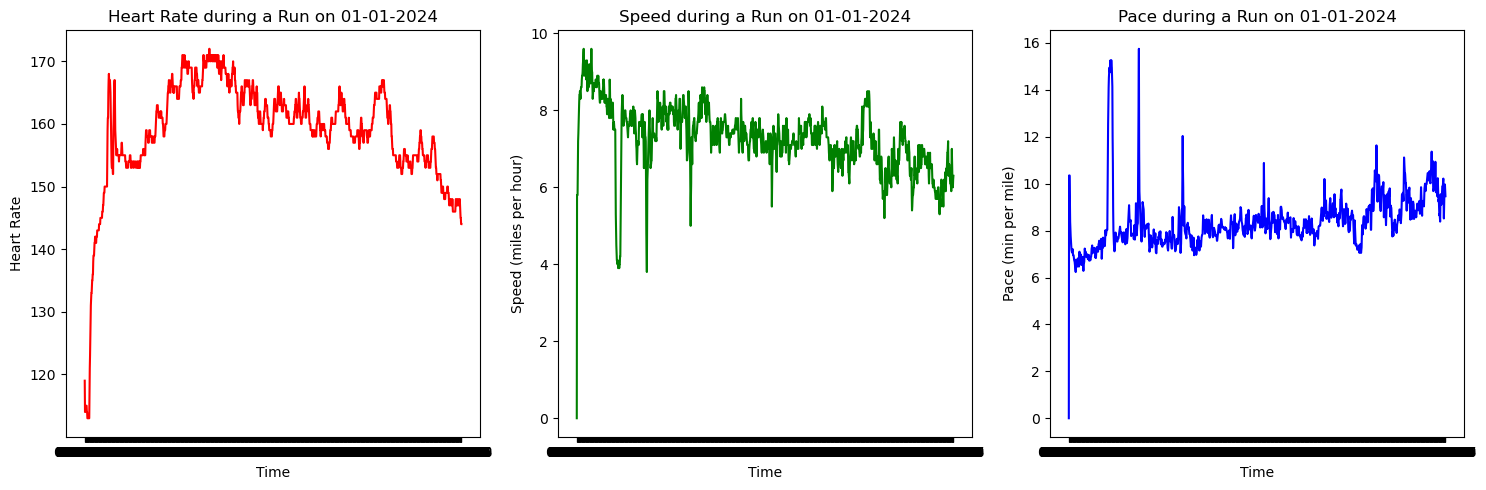

In [127]:
# Plot the Variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Heart Rate vs Time
axes[0].plot(time, heart_rate, color='red')
axes[0].set_ylabel('Heart Rate')
axes[0].set_xlabel('Time')
axes[0].set_title(f'Heart Rate during a Run on {date}')

# Plot Speed vs Time
axes[1].plot(time, speed, color='g')
axes[1].set_ylabel('Speed (miles per hour)')
axes[1].set_xlabel('Time')
axes[1].set_title(f'Speed during a Run on {date}')

# Plot Pace vs Time
axes[2].plot(time, pace, color='b')
axes[2].set_ylabel('Pace (min per mile)')
axes[2].set_xlabel('Time')
axes[2].set_title(f'Pace during a Run on {date}')

# Show the entire figure
plt.tight_layout()
plt.show()

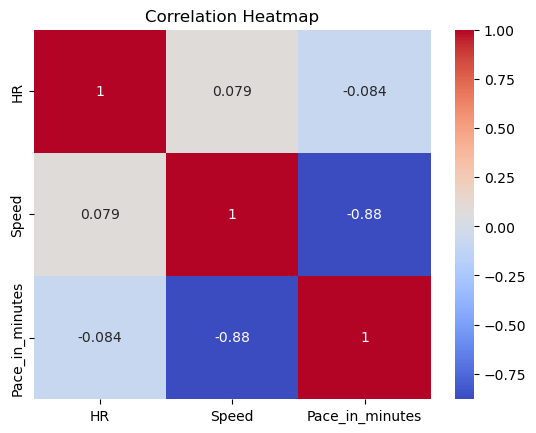

In [128]:
corr_matrix = running_df[['HR', 'Speed', 'Pace_in_minutes']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [129]:
import statsmodels.api as sm
X = sm.add_constant(running_df['Speed']) 
y = running_df['Pace_in_minutes']  
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Pace_in_minutes   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     4790.
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:19:23   Log-Likelihood:                -1185.9
No. Observations:                1420   AIC:                             2376.
Df Residuals:                    1418   BIC:                             2386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1004      0.127    134.681      0.0